<a href="https://colab.research.google.com/github/ShreyaB8/TinyML-Course-Work/blob/main/2-3-9-AssignmentQuestion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create a CNN to classify Cifar-10

Learn about Cifar-10 here: https://www.cs.toronto.edu/~kriz/cifar.html

In class you saw how to build a Convolutional Neural Network that classified Fashion MNIST. Take what you learned to build a CNN that recognizes the 10 classes of CIFAR. It will be a similar network, but there are some key differences you'll need to take into account.

First, while MNIST were 28x28 monochome images (1 color channel), CIFAR are 32x32 color images (3 color channels).

Second, MNIST images are simple, containing just the object, centered in the image, with no background. CIFAR ones can have the object with a background -- for example airplanes might have a cloudy sky behind them! As such you should expect your accuracy to be a bit lower. 

We start by setting up the problem for you.

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

170500096/170498071 [==============================] - 3s 0us/step


We then definte some of the model for you but leave most of it for you to fill in! 

*A hint: your model may want to learn some high level features and then classify them.*

In [2]:
FIRST_LAYER = tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(32, 32, 3))
HIDDEN_LAYER_TYPE_1 = tf.keras.layers.MaxPooling2D(2, 2)
HIDDEN_LAYER_TYPE_2 = tf.keras.layers.Conv2D(64, (3,3), activation='relu')
HIDDEN_LAYER_TYPE_3 = tf.keras.layers.MaxPooling2D(2,2)
HIDDEN_LAYER_TYPE_4 =  tf.keras.layers.Flatten()
HIDDEN_LAYER_TYPE_5 = tf.keras.layers.Dense(20, activation='relu')
LAST_LAYER = tf.keras.layers.Dense(10, activation='softmax')

model = models.Sequential([
       FIRST_LAYER,
       HIDDEN_LAYER_TYPE_1,
       HIDDEN_LAYER_TYPE_2,
       HIDDEN_LAYER_TYPE_3,
       HIDDEN_LAYER_TYPE_4,
       layers.Flatten(),
       HIDDEN_LAYER_TYPE_5,
       LAST_LAYER,
])

You then need to define loss function. And you can then train your model. Once training is done you'll see a plot of training and validation accuracy. You'll know you have a reasonable model with a reasonable loss funciton if your final training accuracy ends up in the 70s (or possibly higher).

*A hint: your model may want to learn different categories.*

Epoch 1/20
1563/1563 [==============================] - 111s 71ms/step - loss: 2.1328 - accuracy: 0.2098 - val_loss: 1.9122 - val_accuracy: 0.3183
Epoch 2/20
1563/1563 [==============================] - 109s 70ms/step - loss: 1.7677 - accuracy: 0.3674 - val_loss: 1.6563 - val_accuracy: 0.3907
Epoch 3/20
1563/1563 [==============================] - 109s 70ms/step - loss: 1.5574 - accuracy: 0.4416 - val_loss: 1.4765 - val_accuracy: 0.4679
Epoch 4/20
1563/1563 [==============================] - 109s 70ms/step - loss: 1.4218 - accuracy: 0.4886 - val_loss: 1.3661 - val_accuracy: 0.5110
Epoch 5/20
1563/1563 [==============================] - 109s 69ms/step - loss: 1.3222 - accuracy: 0.5251 - val_loss: 1.3101 - val_accuracy: 0.5354
Epoch 6/20
1563/1563 [==============================] - 108s 69ms/step - loss: 1.2443 - accuracy: 0.5583 - val_loss: 1.2223 - val_accuracy: 0.5704
Epoch 7/20
1563/1563 [==============================] - 109s 70ms/step - loss: 1.1783 - accuracy: 0.5835 - val_loss: 1

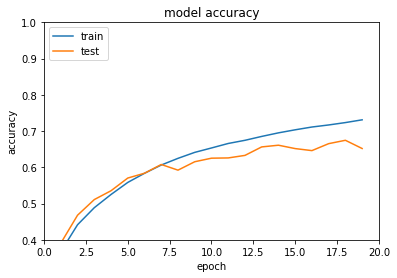

In [4]:
LOSS = 'sparse_categorical_crossentropy'
NUM_EPOCHS = 20 #You can change this value if you like to experiment with it to get better accuracy

# Compile the model
model.compile(optimizer='sgd',
              loss=LOSS,
              metrics=['accuracy'])

# Fit the model
history = model.fit(train_images, train_labels, epochs=NUM_EPOCHS, 
                    validation_data=(test_images, test_labels))

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.xlim([0,NUM_EPOCHS])
plt.ylim([0.4,1.0])
plt.show()

Finally, pick a better optimizer. And re-train your model. You'll know you have a reasonable model with a reasonable loss funciton and optimizer if your final training accuracy ends up in the 80s (or possibly higher).

*A hint: your model may want to learn adaptively.*

In [ ]:
OPTIMIZER = 'adam'

# Compile the model
model.compile(optimizer=OPTIMIZER,
              loss=LOSS,
              metrics=['accuracy'])

# Fit the model
history = model.fit(train_images, train_labels, epochs=NUM_EPOCHS, 
                    validation_data=(test_images, test_labels))

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.xlim([0,NUM_EPOCHS])
plt.ylim([0.4,1.0])
plt.show()

Epoch 1/20
1563/1563 [==============================] - 108s 69ms/step - loss: 0.8937 - accuracy: 0.6879 - val_loss: 0.9739 - val_accuracy: 0.6681
Epoch 2/20
1563/1563 [==============================] - 108s 69ms/step - loss: 0.8205 - accuracy: 0.7157 - val_loss: 0.9371 - val_accuracy: 0.6879
Epoch 3/20
1563/1563 [==============================] - 108s 69ms/step - loss: 0.7559 - accuracy: 0.7374 - val_loss: 0.9167 - val_accuracy: 0.6953
Epoch 4/20
1563/1563 [==============================] - 108s 69ms/step - loss: 0.7046 - accuracy: 0.7561 - val_loss: 0.9133 - val_accuracy: 0.6990
Epoch 5/20
1563/1563 [==============================] - 107s 69ms/step - loss: 0.6597 - accuracy: 0.7705 - val_loss: 0.9327 - val_accuracy: 0.6890
Epoch 6/20
1563/1563 [==============================] - 107s 68ms/step - loss: 0.6157 - accuracy: 0.7848 - val_loss: 0.9093 - val_accuracy: 0.7021
Epoch 7/20
1563/1563 [==============================] - 108s 69ms/step - loss: 0.5722 - accuracy: 0.7983 - val_loss: 0